In [1]:
import torch
import numpy as np
from datasets.augmentations import *
from datasets.SHHS_dataset_timeonly import SHHS_dataset_1
import matplotlib.pyplot as plt
import os
print(os.getcwd())

C:\Users\tomsm\PycharmProjects\thesis\datasets


In [ ]:
def plot_augmentation(x, x_aug):
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(x.squeeze(), linewidth=1.0)
    plt.plot(x_aug.squeeze(), linewidth=1.0, label="Augmented eeg-signal")
    plt.legend(loc="upper left")

In [28]:
data_hparams = {
    "transform-prob": 1.0,
    "amplitude-min": 0.75,
    "amplitude-max": 1.5,
    "timeshift-min": 5,
    "timeshift-max": 300,
    "zeromask-min": 300,
    "zeromask-max": 500,
    "noise-min": 0,
    "noise-max": 0.3
  }

Text(0.5, 1.0, 'Class tensor([4.]) example')

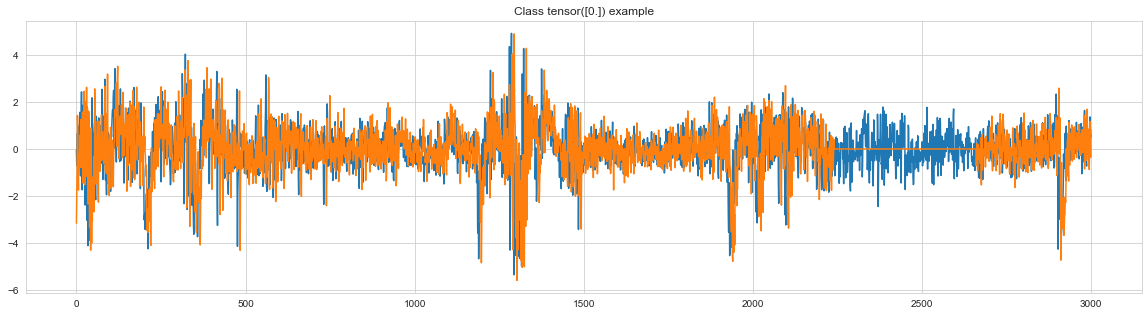

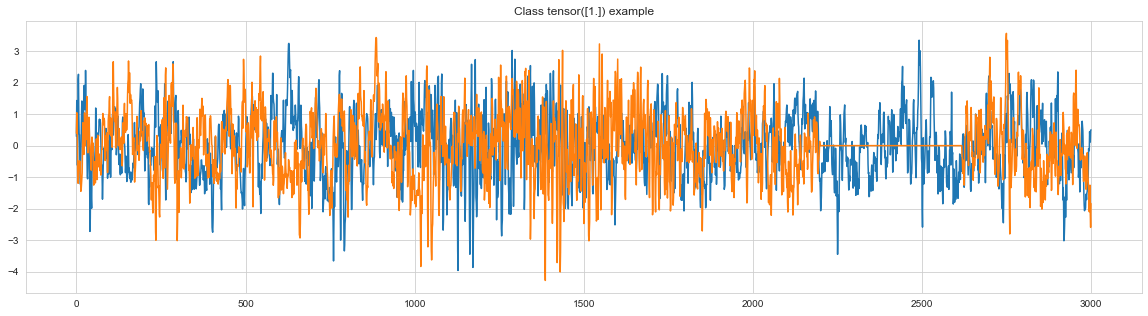

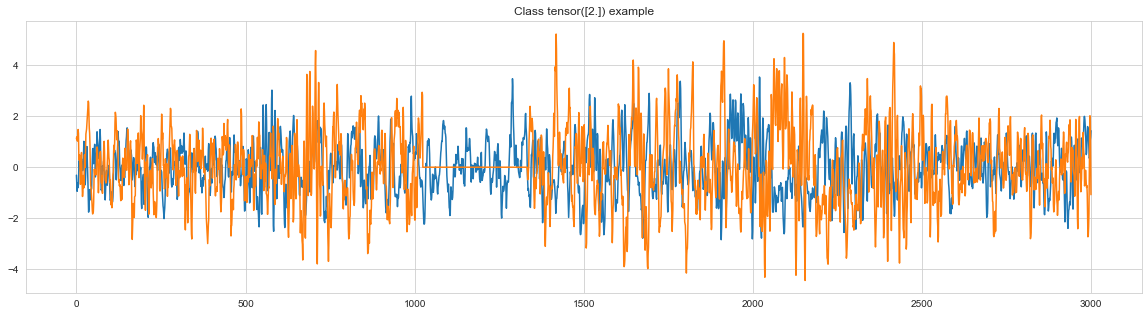

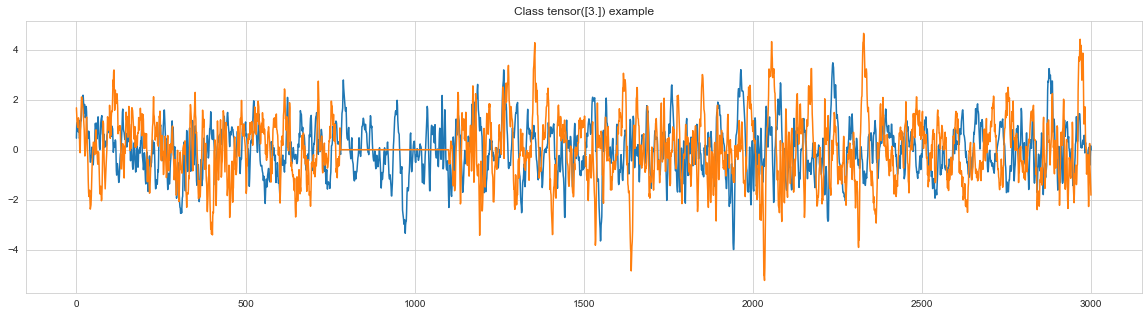

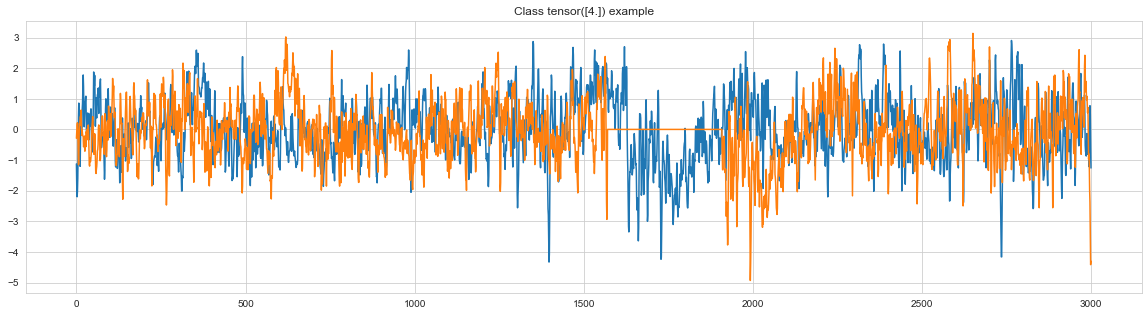

In [29]:
ds = SHHS_dataset_1(data_path='../../thesis01/data/',
                    first_patient=1,
                    num_patients=1)
p = data_hparams['transform-prob']
contrast_transforms = ContrastiveTransformations(
    [
        AmplitudeScale(data_hparams["amplitude-min"], data_hparams["amplitude-max"], p, 1),
        GaussianNoise(data_hparams["noise-min"], data_hparams["noise-max"], p, 1),
        ZeroMask(data_hparams["zeromask-min"], data_hparams["zeromask-max"], p, 1),
        TimeShift(data_hparams["timeshift-min"], data_hparams["timeshift-max"], p, 1)
    ], n_views=2
)
ds_aug = SHHS_dataset_1(data_path='../../thesis01/data/',
                        first_patient=1,
                        num_patients=1,
                        transform=contrast_transforms)

plt.rcParams['figure.figsize'] = [20, 5]
x1, l1 = ds.__getitem__(3)      # +1 in Matlab!!
x1_augs = ds_aug.__getitem__(3)[0]
plt.plot(x1.squeeze())
plt.plot(x1_augs[0].squeeze())
plt.title(f"Class {l1} example")

plt.figure()
x2, l2 = ds.__getitem__(724)
x2_augs = ds_aug.__getitem__(724)[0]
plt.plot(x2.squeeze())
plt.plot(x2_augs[0].squeeze())

plt.title(f"Class {l2} example")

plt.figure()
x3, l3 = ds.__getitem__(40)
x3_augs = ds_aug.__getitem__(40)[0]
plt.plot(x3.squeeze())

plt.plot(x3_augs[0].squeeze())
plt.title(f"Class {l3} example")

plt.figure()
x4, l4 = ds.__getitem__(50)
x4_augs = ds_aug.__getitem__(50)[0]
plt.plot(x4.squeeze())
plt.plot(x4_augs[0].squeeze())
plt.title(f"Class {l4} example")

plt.figure()
x5, l5 = ds.__getitem__(264)
x5_augs = ds_aug.__getitem__(264)[0]
plt.plot(x5.squeeze())
plt.plot(x5_augs[0].squeeze())
plt.title(f"Class {l5} example")

In [17]:
x1_aug = ds_aug.__getitem__(3)[0]
x1_aug

[tensor([[[-0.3948,  0.8412,  0.2131,  ..., -0.4186, -2.2157, -1.9858]]]),
 tensor([[[-3.2439, -3.0723, -0.3856,  ...,  0.4999, -0.1330,  0.1007]]])]